# K-Fold Cross Validation


In [2]:
from sklearn.model_selection import KFold # import KFold
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[5,6],[7,8]]) # create an array
y = np.array([1, 2, 3, 4,5,6]) # Create another array

kf = KFold(n_splits=3, random_state=None, shuffle=False)


In [3]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [4]:
y

array([1, 2, 3, 4, 5, 6])

In [6]:
fold =0
for train_index, test_index in kf.split(X):
    fold=fold+1
    print("Fold",fold,"TRAIN index:", train_index, "TEST index:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   

Fold 1 TRAIN index: [2 3 4 5] TEST index: [0 1]
Fold 2 TRAIN index: [0 1 4 5] TEST index: [2 3]
Fold 3 TRAIN index: [0 1 2 3] TEST index: [4 5]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold # import KFold

url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:

# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price','condition','grade','yr_built','zipcode']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,condition,grade,yr_built,zipcode
0,3,1.00,1180,5650,1.0,221900.0,3,7,1955,98178
1,3,2.25,2570,7242,2.0,538000.0,3,7,1951,98125
2,2,1.00,770,10000,1.0,180000.0,3,6,1933,98028
3,4,3.00,1960,5000,1.0,604000.0,5,7,1965,98136
4,3,2.00,1680,8080,1.0,510000.0,3,8,1987,98074
5,4,4.50,5420,101930,1.0,1225000.0,3,11,2001,98053
6,3,2.25,1715,6819,2.0,257500.0,3,7,1995,98003
7,3,1.50,1060,9711,1.0,291850.0,3,7,1963,98198
8,3,1.00,1780,7470,1.0,229500.0,3,7,1960,98146
9,3,2.50,1890,6560,2.0,323000.0,3,7,2003,98038


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21613 non-null  int64  
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   sqft_lot     21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   price        21613 non-null  float64
 6   condition    21613 non-null  int64  
 7   grade        21613 non-null  int64  
 8   yr_built     21613 non-null  int64  
 9   zipcode      21613 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


<Axes: >

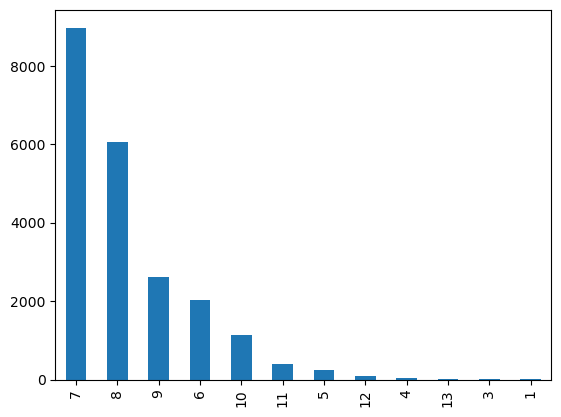

In [23]:
df['grade'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [11]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price','condition','yr_built','zipcode']
X = df.loc[:, features]
y = df.loc[:, ['grade']]

In [12]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,condition,yr_built,zipcode
0,3,1.00,1180,5650,1.0,221900.0,3,1955,98178
1,3,2.25,2570,7242,2.0,538000.0,3,1951,98125
2,2,1.00,770,10000,1.0,180000.0,3,1933,98028
3,4,3.00,1960,5000,1.0,604000.0,5,1965,98136
4,3,2.00,1680,8080,1.0,510000.0,3,1987,98074
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,360000.0,3,2009,98103
21609,4,2.50,2310,5813,2.0,400000.0,3,2014,98146
21610,2,0.75,1020,1350,2.0,402101.0,3,2009,98144
21611,3,2.50,1600,2388,2.0,400000.0,3,2004,98027


In [13]:
y

,grade
0,7
1,7
2,6
3,7
4,8
...,...
21608,8
21609,8
21610,7
21611,8


In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
fold = 0
for train_index, test_index in kfold.split(X):
    fold += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("Fold :",fold, "X_train:", X_train.shape, "y_train:", y_train.shape)

    

Fold : 1 X_train: (17290, 9) y_train: (17290, 1)
Fold : 2 X_train: (17290, 9) y_train: (17290, 1)
Fold : 3 X_train: (17290, 9) y_train: (17290, 1)
Fold : 4 X_train: (17291, 9) y_train: (17291, 1)
Fold : 5 X_train: (17291, 9) y_train: (17291, 1)


# Stratified K-Fold Cross Validation


/Users/tuchsanai/opt/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


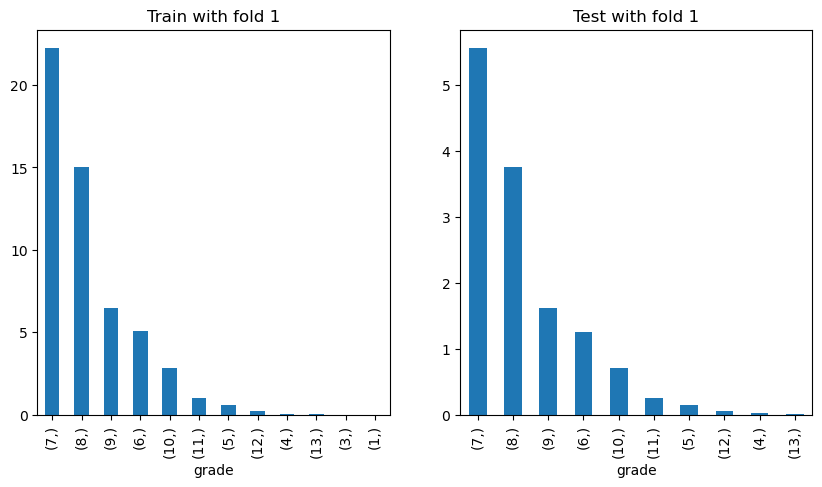

X_train: (17290, 9) y_train: (17290, 1)


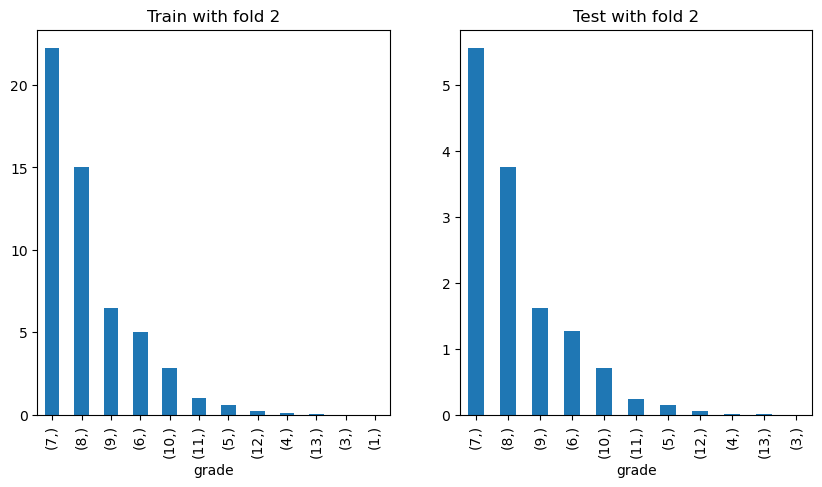

X_train: (17290, 9) y_train: (17290, 1)


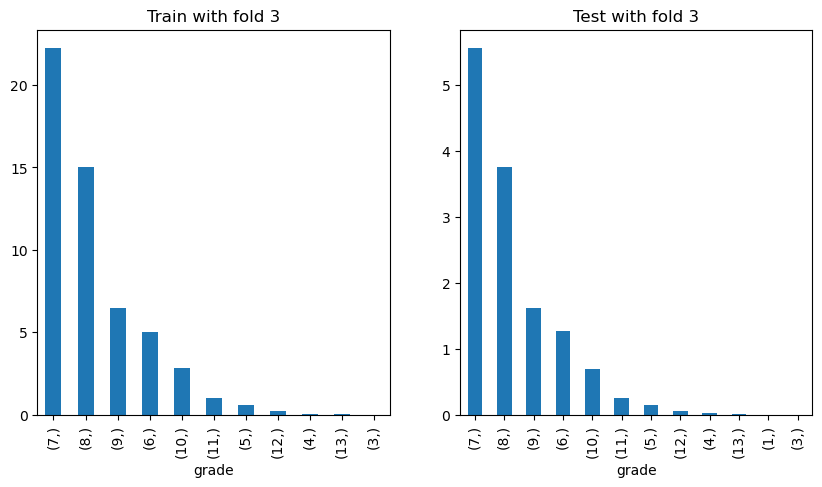

X_train: (17290, 9) y_train: (17290, 1)


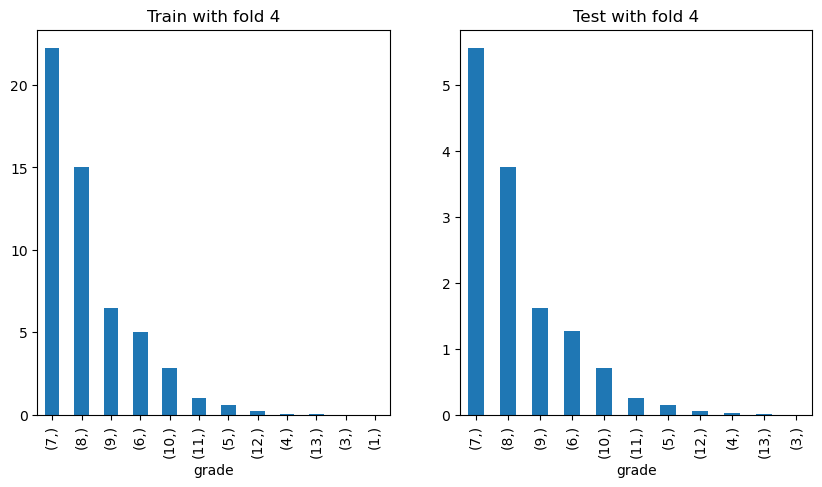

X_train: (17291, 9) y_train: (17291, 1)


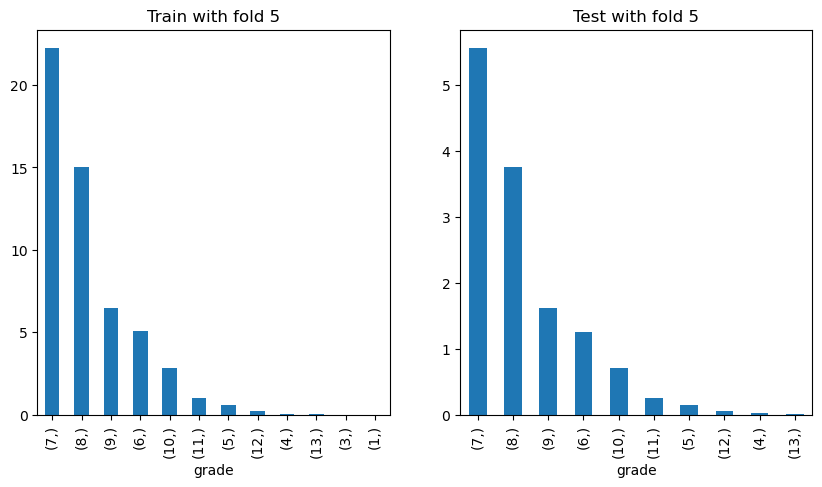

X_train: (17291, 9) y_train: (17291, 1)


In [22]:

from sklearn.model_selection import StratifiedKFold


strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold = 0
for train_index, test_index in strat_kfold.split(X, y.astype('int')):
    fold += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

 
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    (100*y_train.value_counts().sort_values(ascending=False)/df['floors'].sum()).plot(kind='bar', ax=axs[0], title='Train with fold '+str(fold))
    (100*y_test.value_counts().sort_values(ascending=False)/df['floors'].sum()).plot(kind='bar', ax=axs[1], title='Test with fold '+str(fold))
    plt.show()

    print("X_train:", X_train.shape, "y_train:", y_train.shape)